# CNN

In [1]:
%matplotlib inline
#-*- coding: UTF-8 -*-
import sys
import statsmodels as ss
import numpy as np
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import keras.models
from keras.layers import Dense, Activation, Conv2D, Flatten, MaxPooling2D
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

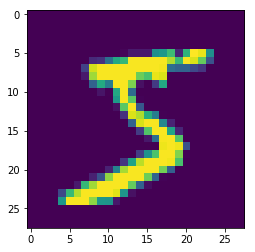

In [3]:
#plot the first image in the dataset
plt.imshow(X_train[0])

In [4]:
#check image shape
X_train[0].shape

(28, 28)

In [5]:
X_train = X_train.reshape(60000,28,28,1)
X_validation = X_train[:30000]
X_train = X_train[:60000]
X_test = X_test.reshape(10000,28,28,1)

In [6]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_validation = y_train[:30000]
y_train = y_train[:60000]

In [7]:
from keras.models import Sequential

model = Sequential()

W0222 17:00:30.689327 4601542080 deprecation_wrapper.py:119] From /Users/hauyuan/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [8]:
#add model layers
model.add(Conv2D(25, kernel_size=3, activation='relu', input_shape=(28,28,1)))    #沒加activation的話acc=0.012
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(50, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(50, kernel_size=3, activation='relu'))                           #沒加這層的話acc=0.2
model.add(MaxPooling2D(2, 2))

W0222 17:00:30.714748 4601542080 deprecation_wrapper.py:119] From /Users/hauyuan/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0222 17:00:30.721421 4601542080 deprecation_wrapper.py:119] From /Users/hauyuan/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0222 17:00:30.749644 4601542080 deprecation_wrapper.py:119] From /Users/hauyuan/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [9]:
model.add(Flatten())

In [10]:
model.add(Dense(output_dim=100))
model.add(Activation('relu'))
model.add(Dense(output_dim=50))    #沒加這層的話acc=0.2
model.add(Activation('relu'))
model.add(Dense(output_dim=10))
model.add(Activation('softmax'))

/Users/hauyuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=100)`
  """Entry point for launching an IPython kernel.
/Users/hauyuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=50)`
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hauyuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10)`
  """


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0222 17:00:30.873316 4601542080 deprecation_wrapper.py:119] From /Users/hauyuan/anaconda3/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0222 17:00:30.906426 4601542080 deprecation_wrapper.py:119] From /Users/hauyuan/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [12]:
model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=3)

W0222 17:00:31.064306 4601542080 deprecation.py:323] From /Users/hauyuan/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0222 17:00:31.130882 4601542080 deprecation_wrapper.py:119] From /Users/hauyuan/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 30000 samples
Epoch 1/3
60000/60000 [==============================] - 25s 424us/step - loss: 0.5412 - acc: 0.9113 - val_loss: 0.0841 - val_acc: 0.9745
Epoch 2/3
60000/60000 [==============================] - 27s 456us/step - loss: 0.0943 - acc: 0.9715 - val_loss: 0.0637 - val_acc: 0.9802
Epoch 3/3
60000/60000 [==============================] - 25s 419us/step - loss: 0.0736 - acc: 0.9783 - val_loss: 0.0580 - val_acc: 0.9815


In [13]:
model.fit(X_test, y_test, epochs=3)

Epoch 1/3
10000/10000 [==============================] - 4s 384us/step - loss: 0.0681 - acc: 0.9812
Epoch 2/3
10000/10000 [==============================] - 4s 385us/step - loss: 0.0400 - acc: 0.9870
Epoch 3/3
10000/10000 [==============================] - 4s 369us/step - loss: 0.0292 - acc: 0.9901


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 25)        250       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 25)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 50)        11300     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 50)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 50)          22550     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50)                0         
__________